<a href="https://colab.research.google.com/github/brandonkeung/MAGIC-Gamma-Telescope/blob/main/MAGIC_Gamma_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning


In [3]:
# Goal is to classify whether sample is gamma or hadron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [4]:
# import data frame and label each column
# col names can also be referred to as features
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [5]:
# Converts all "g" to 1 and all others("h") to 0s
df["class"] = (df["class"] == "g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

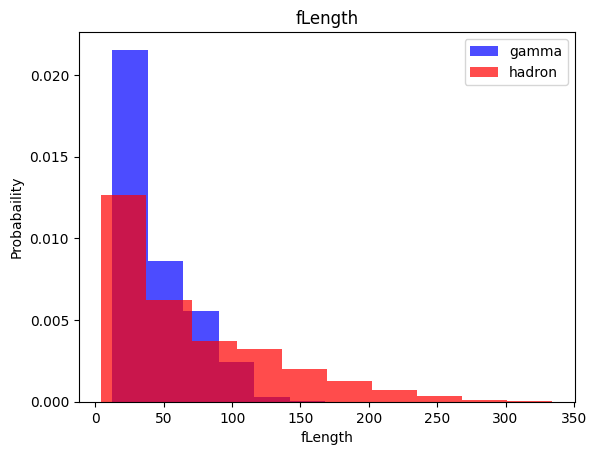

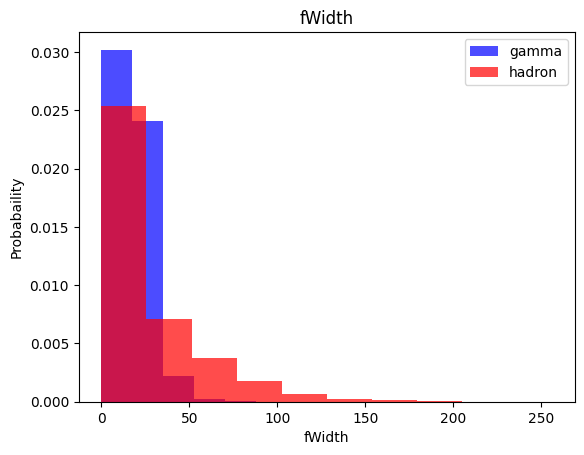

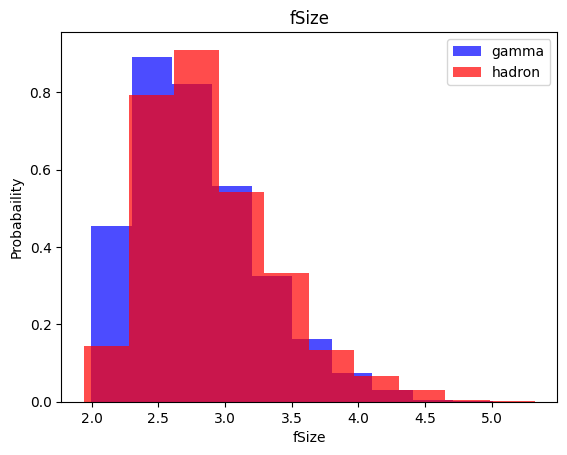

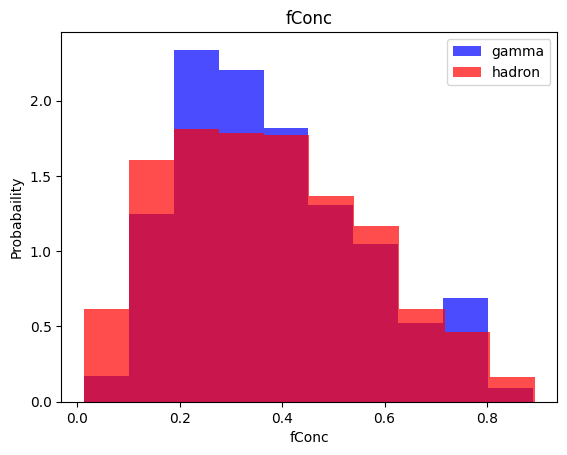

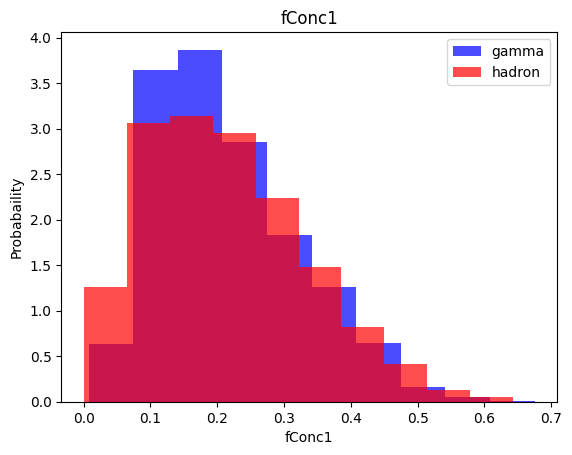

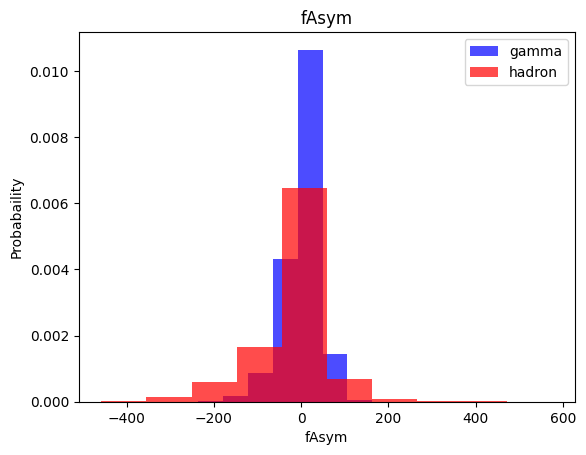

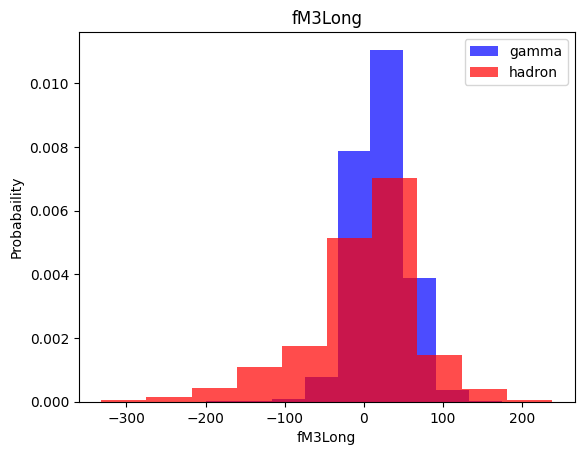

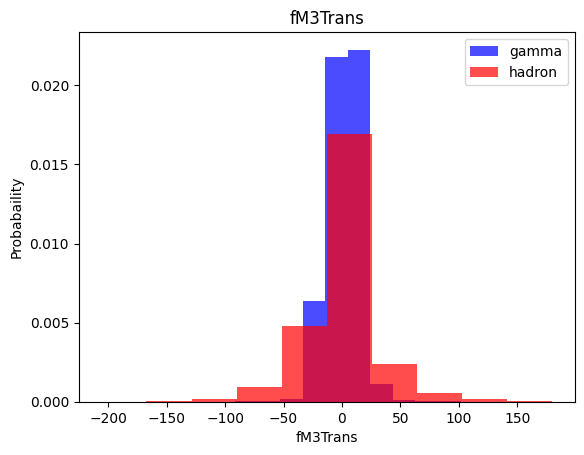

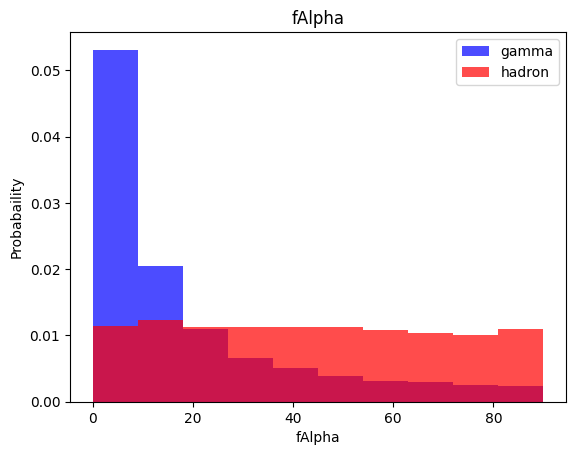

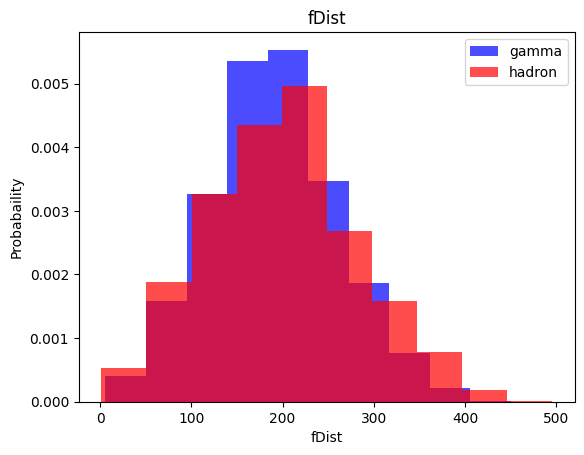

In [6]:
'''
Iterating over all columns except for the outcome and plot on a histogram blue for the gamma 
and red for hadron. We can see which features are good predictors for the class
alpha represents transparency
density=True means we are normalizing
'''
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probabaility")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation, test datasets

In [7]:
# segments portions of dat as train, valid, and test
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
# scales inputs so that they are relative to mean and standrad deviation of specific columns
# note: upper case variable name refers to matrices while lower case variable names refer to 1D arrays
# oversample=True makes it so equal amounts of gamma and hadron are in the training datasets
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  # horizontally stack two arrays
  data = np.hstack((X, np.reshape(y, (len(y), 1))))

  return data, X, y

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
# do not want to oversample because want to see if our model is accurate
test, X_test, y_test = scale_dataset(test, oversample=False) 

# kNN

Uses k-nearest neighbors to determine what an unlabeled point might be labeld as

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [14]:
# 82% accuracy
# precision and recall: https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png
# f1-score combines precision score and recall score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1334
           1       0.86      0.88      0.87      2470

    accuracy                           0.83      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.83      0.83      3804



# Naive Bayes

*   Maximum A Posteriori (MAP)
*   Uses logistic regression/sigmoid function to get values [0,1]
*   also uses bayes formula to create post = (likelihood * prior)/evidence
*   note evidence is a constant





In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [17]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.40      0.51      1334
           1       0.74      0.91      0.81      2470

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [20]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1334
           1       0.85      0.82      0.84      2470

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines (SVM)

Kernel trick to find hyperplane in which it creates a good decision boundary

In [21]:
from sklearn.svm import SVC

In [22]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [23]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1334
           1       0.89      0.91      0.90      2470

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



In [24]:
import tensorflow as tf

In [25]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

# combination of the above two functions
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [26]:
# relu is 0 for negative and linear for positive
# sigmoid is logistic regression [0,1]
# dropout reduces overfitting
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history


16 nodes, dropout 0, lr 0.01, batch size 32


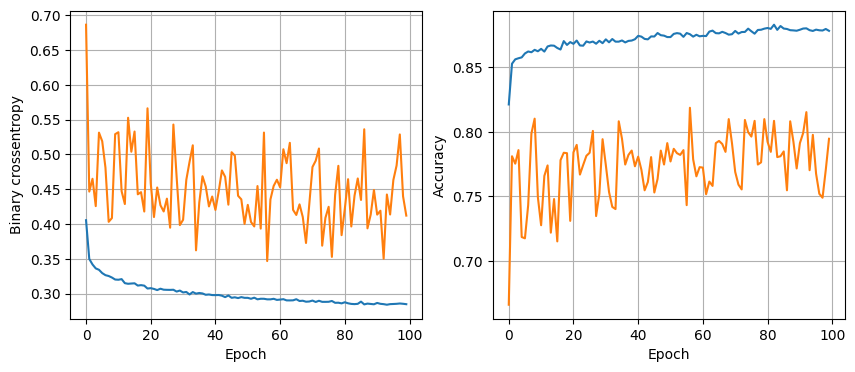

155/155 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8543
16 nodes, dropout 0, lr 0.01, batch size 64


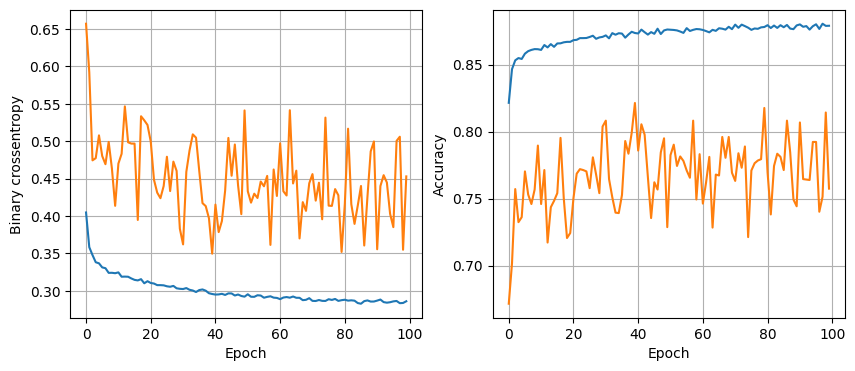

155/155 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8462
16 nodes, dropout 0, lr 0.01, batch size 128


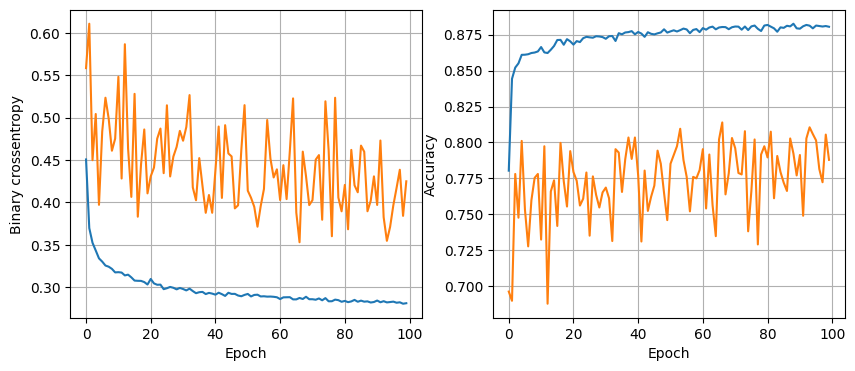

155/155 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8488
16 nodes, dropout 0, lr 0.005, batch size 32


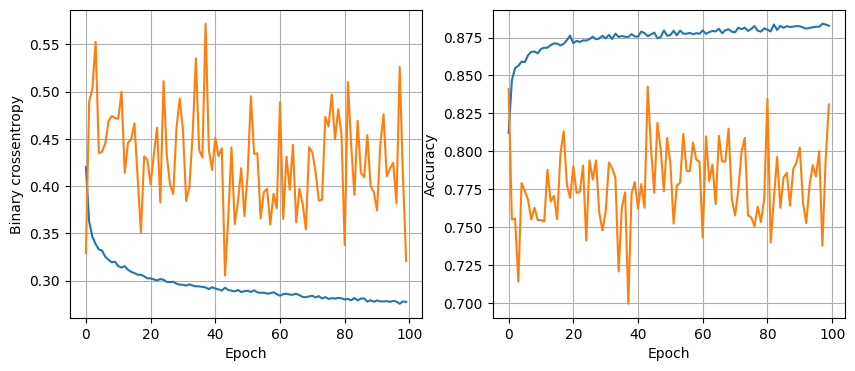

155/155 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8521
16 nodes, dropout 0, lr 0.005, batch size 64


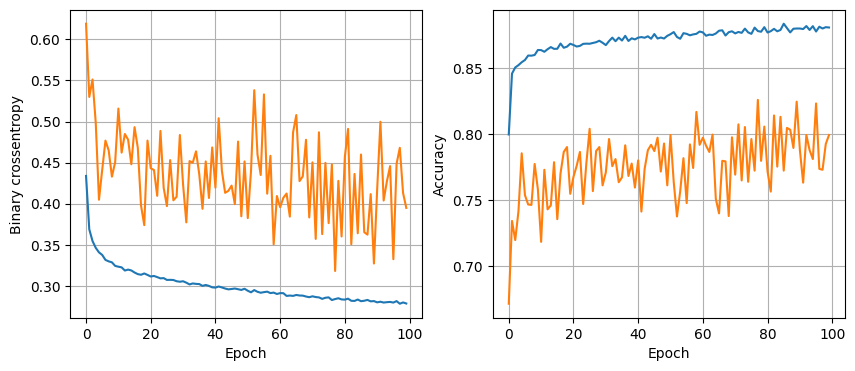

155/155 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8490
16 nodes, dropout 0, lr 0.005, batch size 128


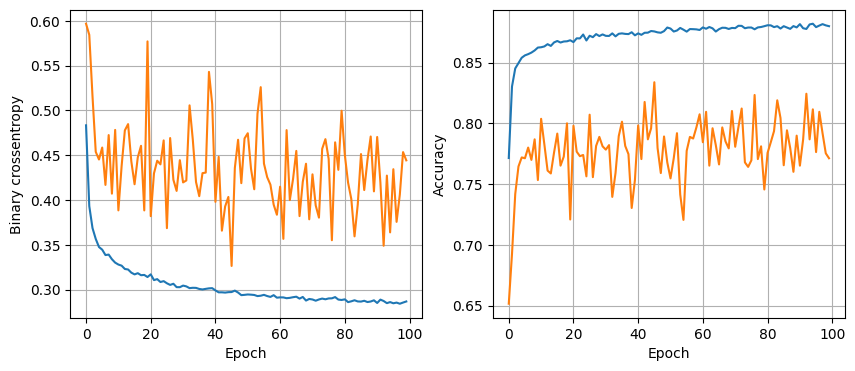

155/155 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8476
16 nodes, dropout 0, lr 0.001, batch size 32


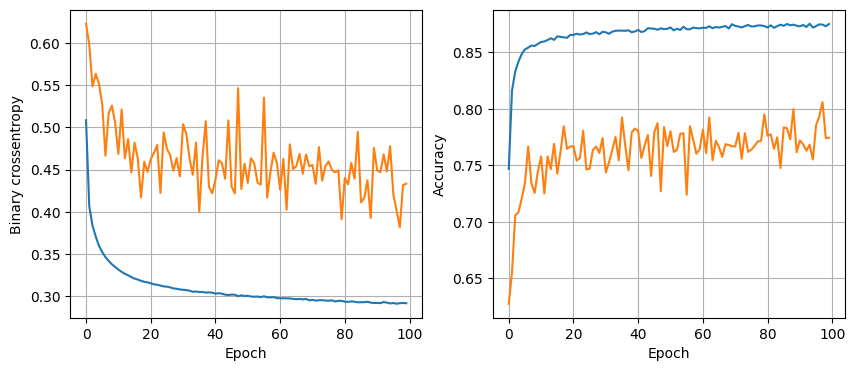

155/155 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8502
16 nodes, dropout 0, lr 0.001, batch size 64


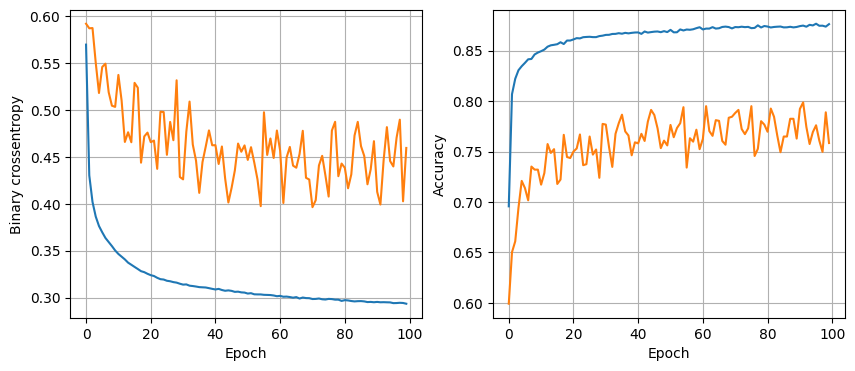

155/155 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8490
16 nodes, dropout 0, lr 0.001, batch size 128


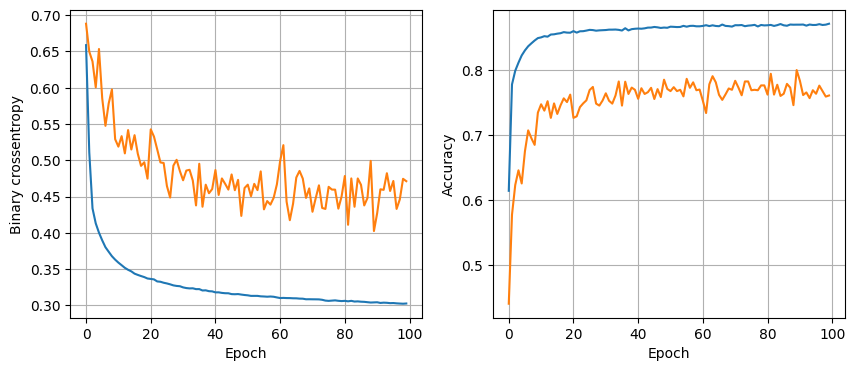

155/155 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8466
16 nodes, dropout 0.2, lr 0.01, batch size 32


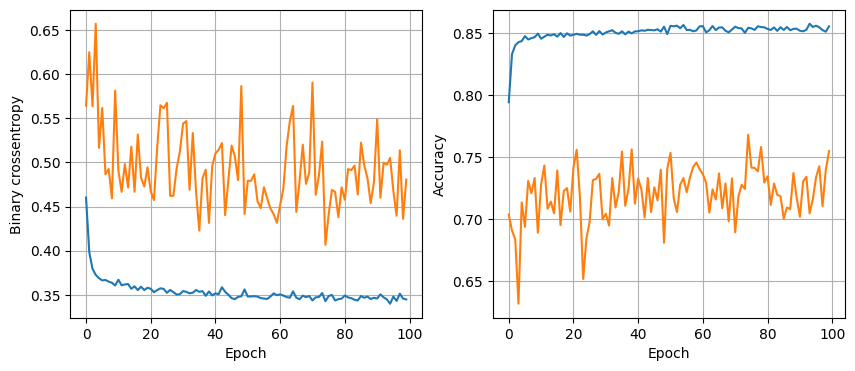

155/155 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8411
16 nodes, dropout 0.2, lr 0.01, batch size 64


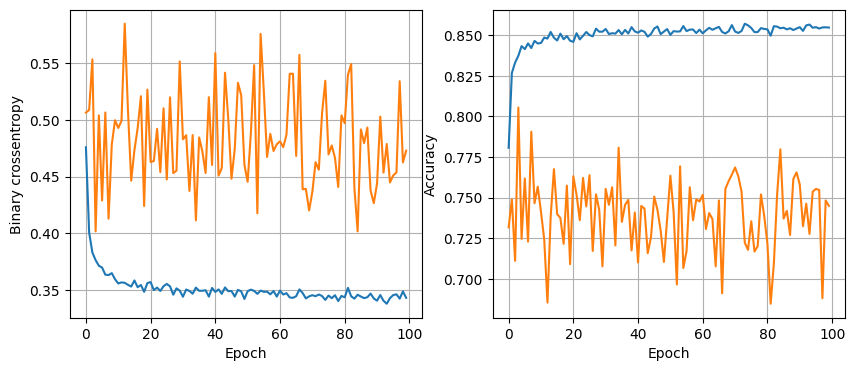

155/155 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8375
16 nodes, dropout 0.2, lr 0.01, batch size 128


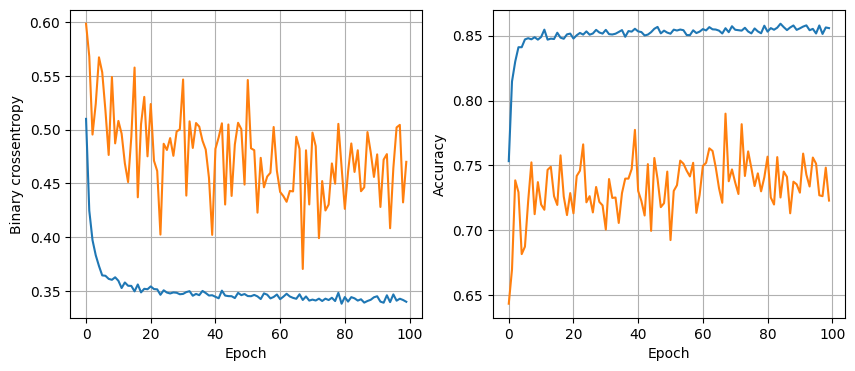

155/155 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8361
16 nodes, dropout 0.2, lr 0.005, batch size 32


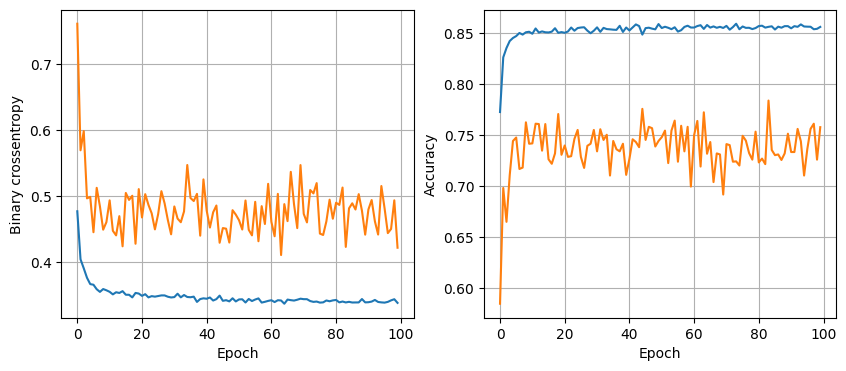

155/155 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8486
16 nodes, dropout 0.2, lr 0.005, batch size 64


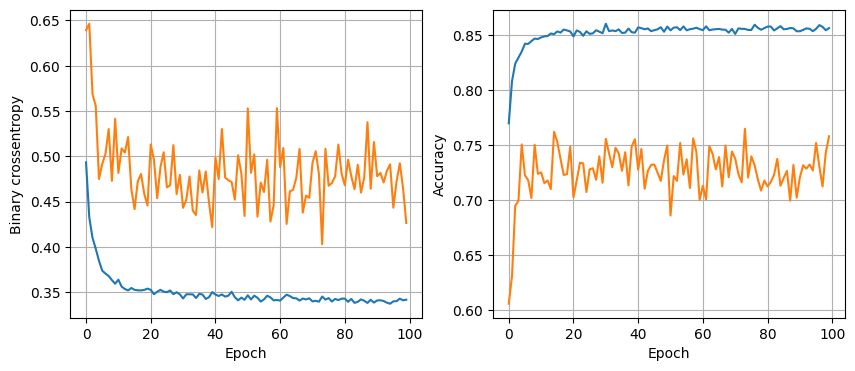

155/155 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8456
16 nodes, dropout 0.2, lr 0.005, batch size 128


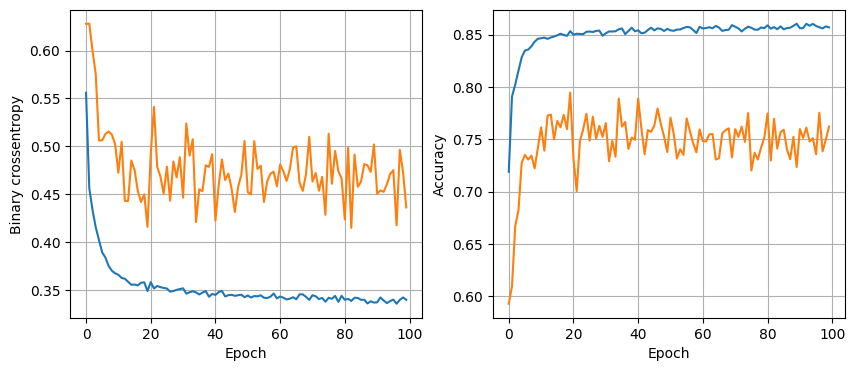

155/155 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.8393
16 nodes, dropout 0.2, lr 0.001, batch size 32


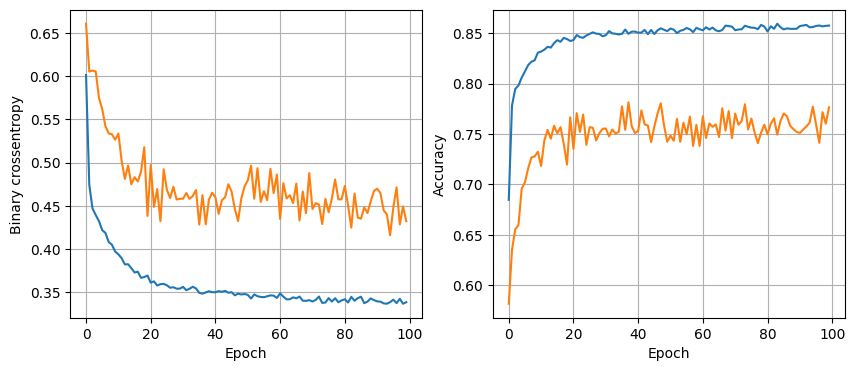

155/155 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8438
16 nodes, dropout 0.2, lr 0.001, batch size 64


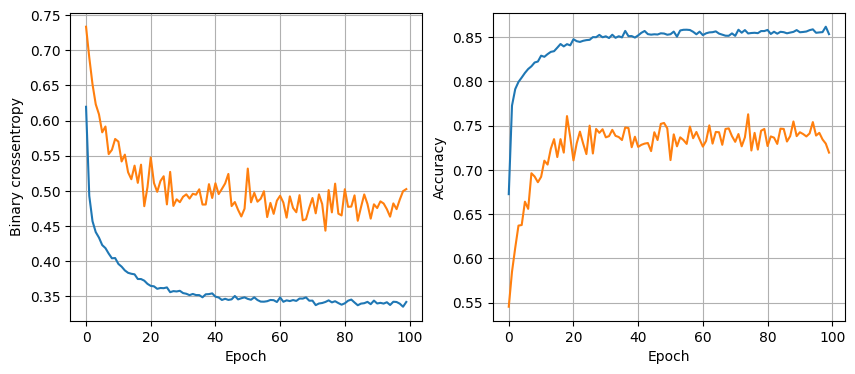

155/155 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8383
16 nodes, dropout 0.2, lr 0.001, batch size 128


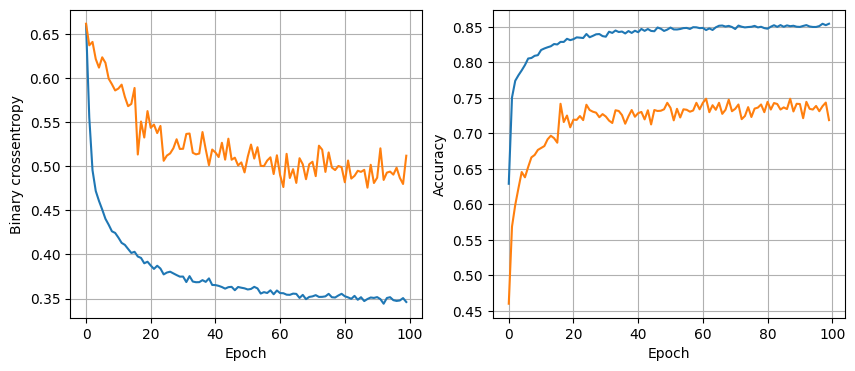

155/155 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8321
32 nodes, dropout 0, lr 0.01, batch size 32


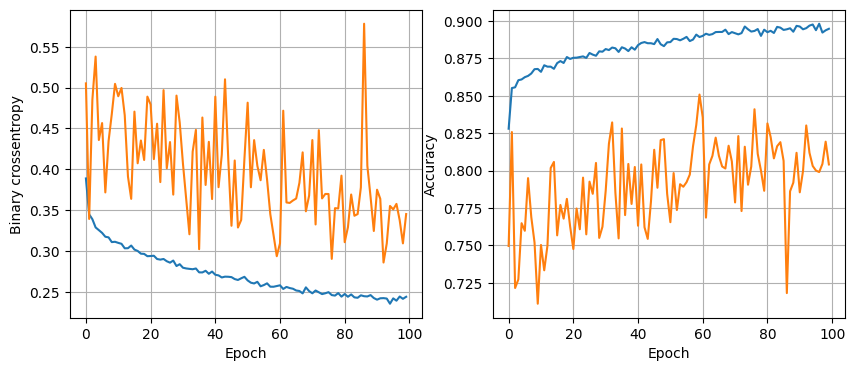

155/155 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8379
32 nodes, dropout 0, lr 0.01, batch size 64


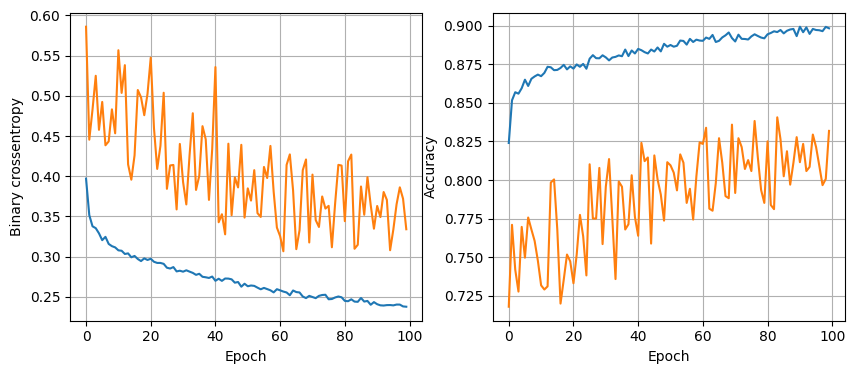

155/155 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8414
32 nodes, dropout 0, lr 0.01, batch size 128


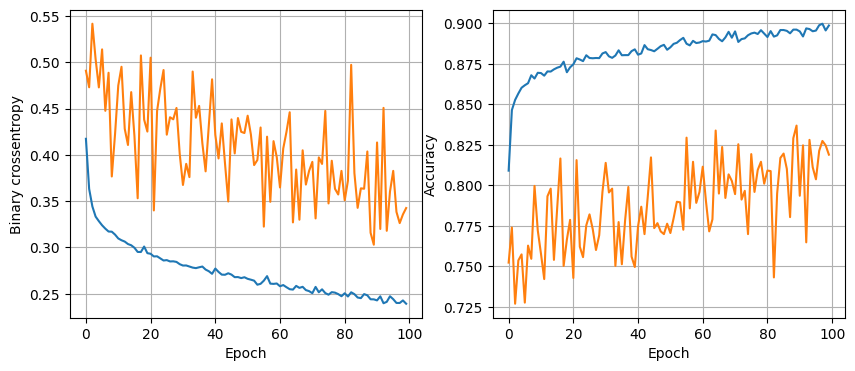

155/155 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8466
32 nodes, dropout 0, lr 0.005, batch size 32


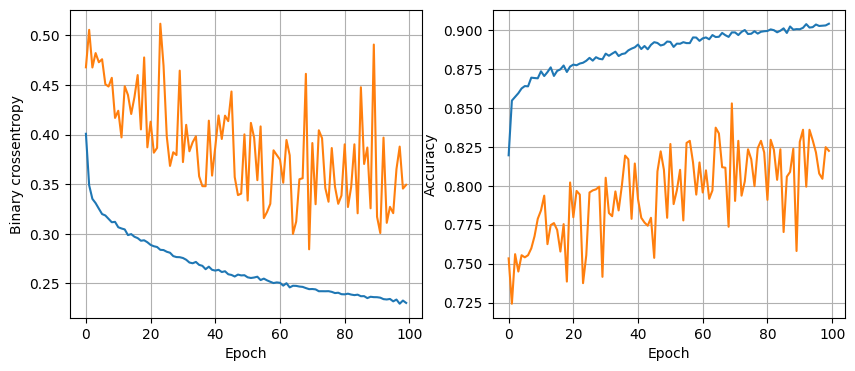

155/155 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8424
32 nodes, dropout 0, lr 0.005, batch size 64


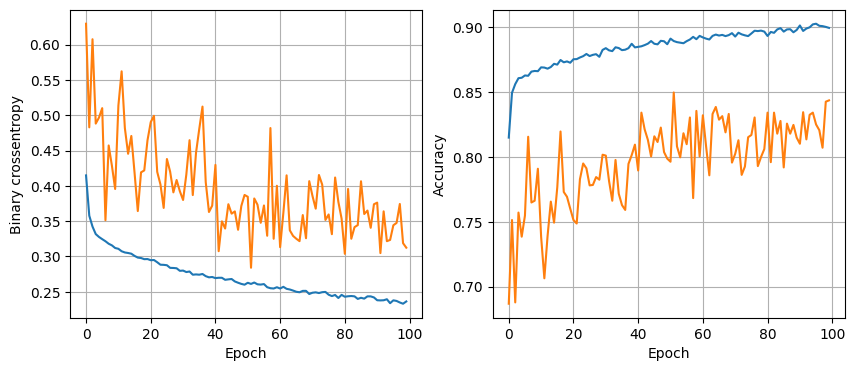

155/155 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8470
32 nodes, dropout 0, lr 0.005, batch size 128


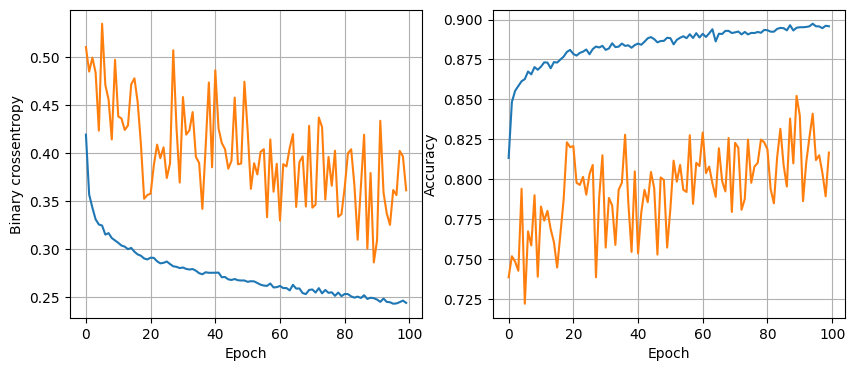

155/155 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8466
32 nodes, dropout 0, lr 0.001, batch size 32


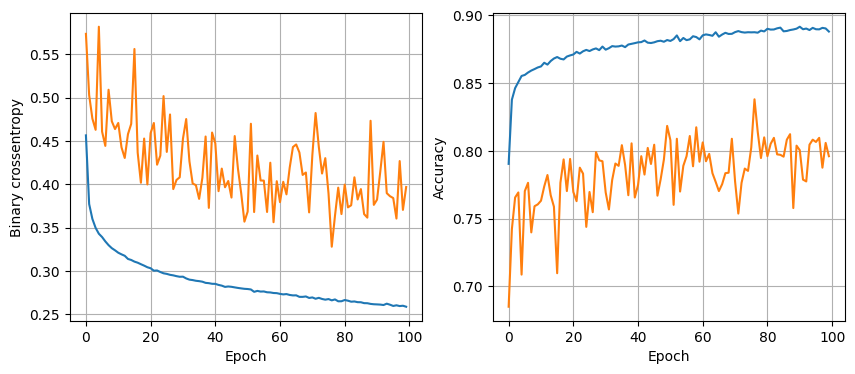

155/155 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8440
32 nodes, dropout 0, lr 0.001, batch size 64


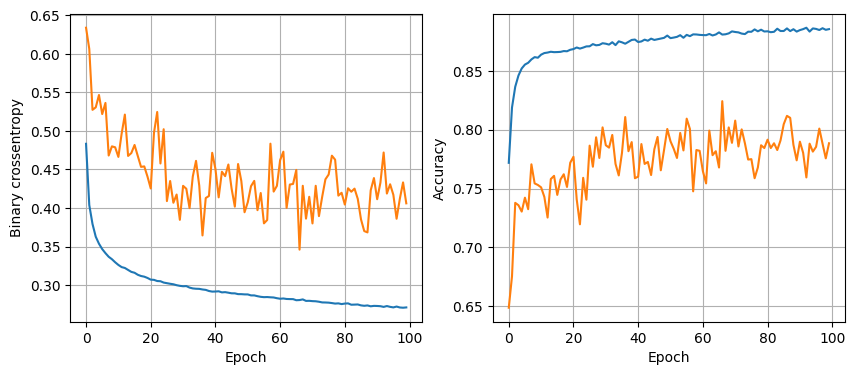

155/155 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8551
32 nodes, dropout 0, lr 0.001, batch size 128


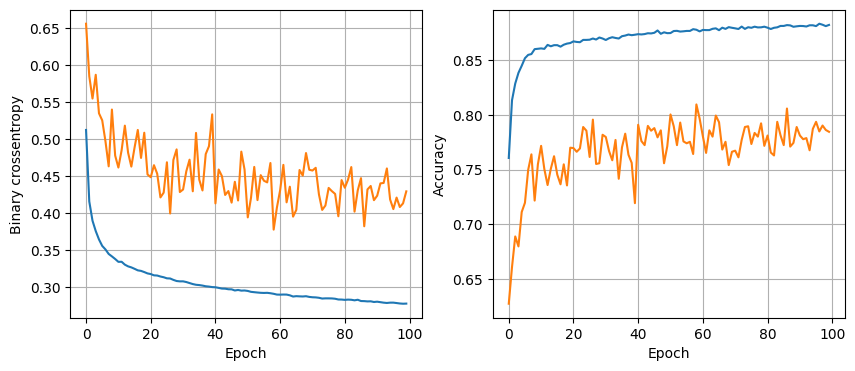

155/155 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8529
32 nodes, dropout 0.2, lr 0.01, batch size 32


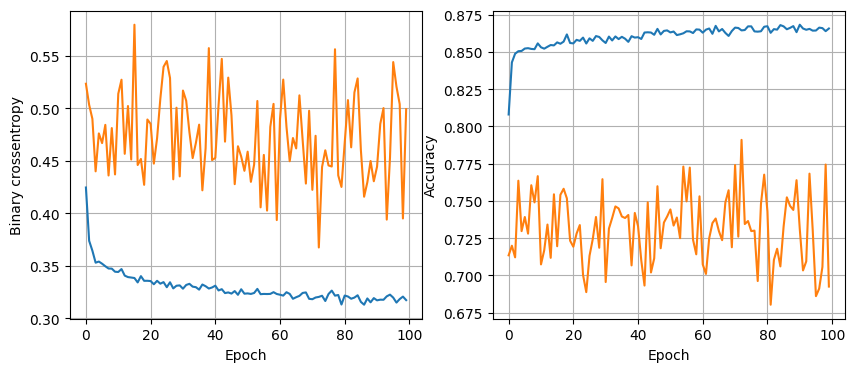

155/155 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8282
32 nodes, dropout 0.2, lr 0.01, batch size 64


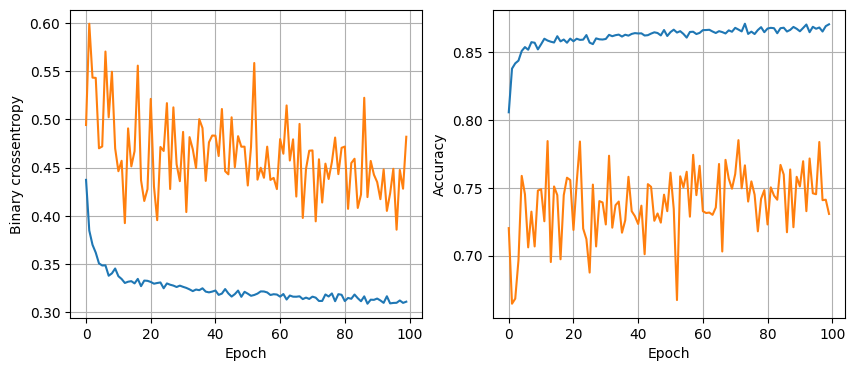

155/155 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8387
32 nodes, dropout 0.2, lr 0.01, batch size 128


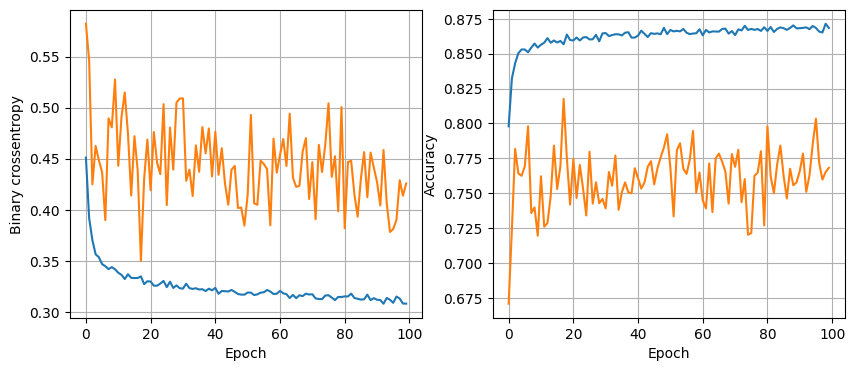

155/155 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8472
32 nodes, dropout 0.2, lr 0.005, batch size 32


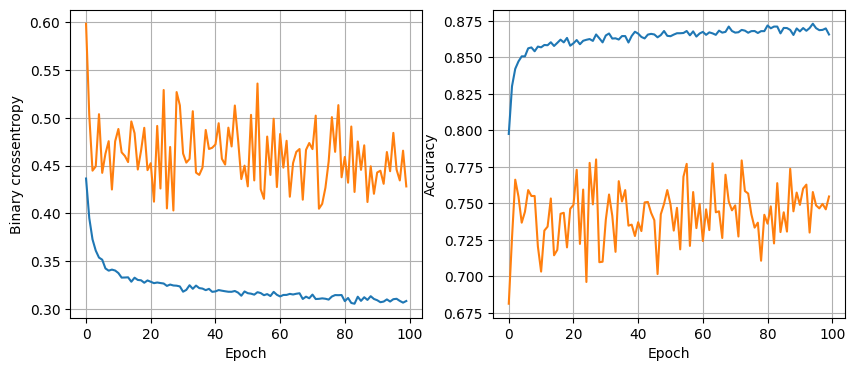

155/155 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8468
32 nodes, dropout 0.2, lr 0.005, batch size 64


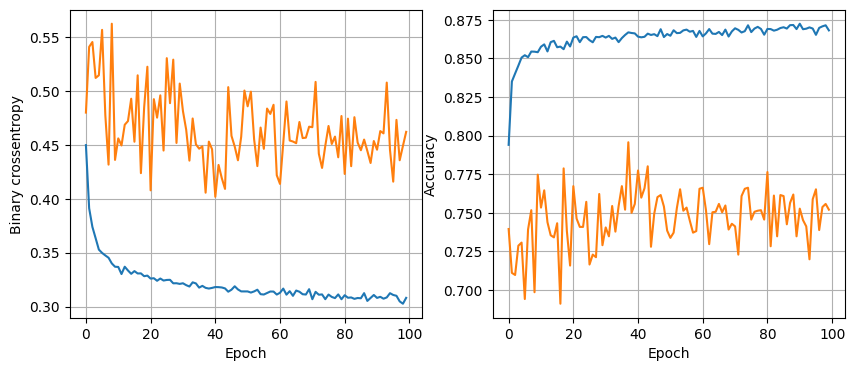

155/155 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.8401
32 nodes, dropout 0.2, lr 0.005, batch size 128


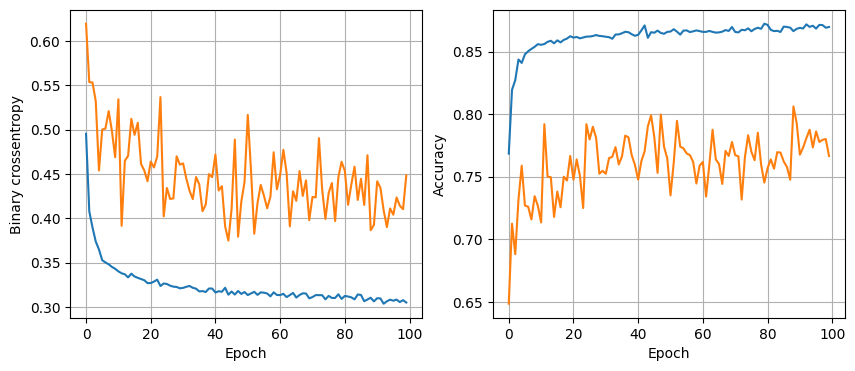

155/155 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.8492
32 nodes, dropout 0.2, lr 0.001, batch size 32


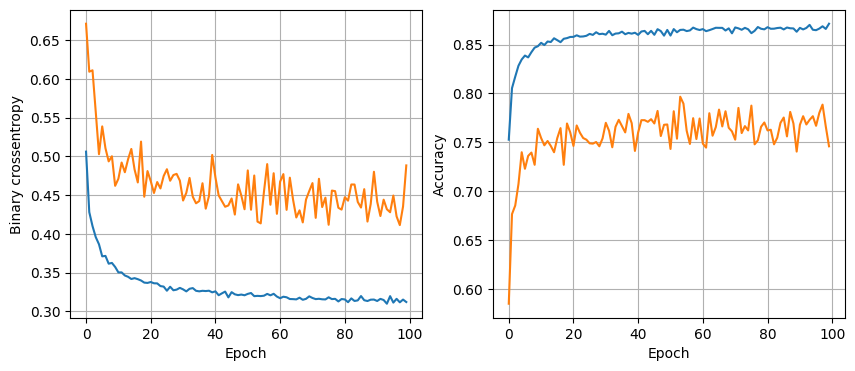

155/155 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8420
32 nodes, dropout 0.2, lr 0.001, batch size 64


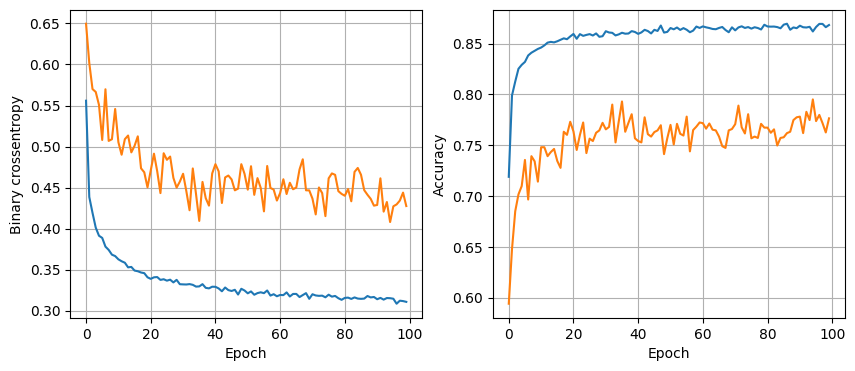

155/155 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8525
32 nodes, dropout 0.2, lr 0.001, batch size 128


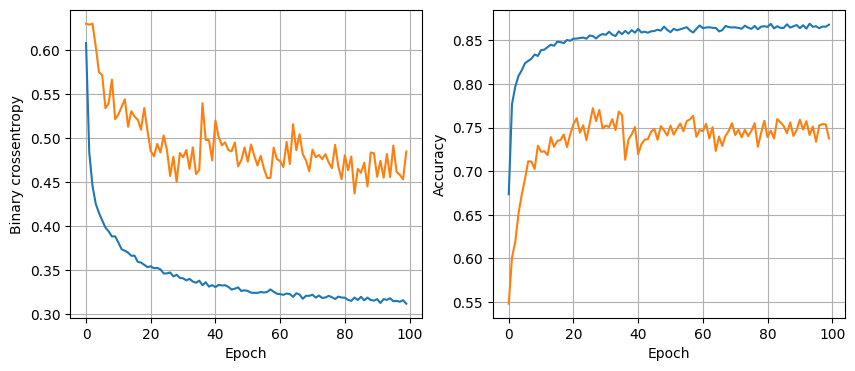

155/155 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8438
64 nodes, dropout 0, lr 0.01, batch size 32


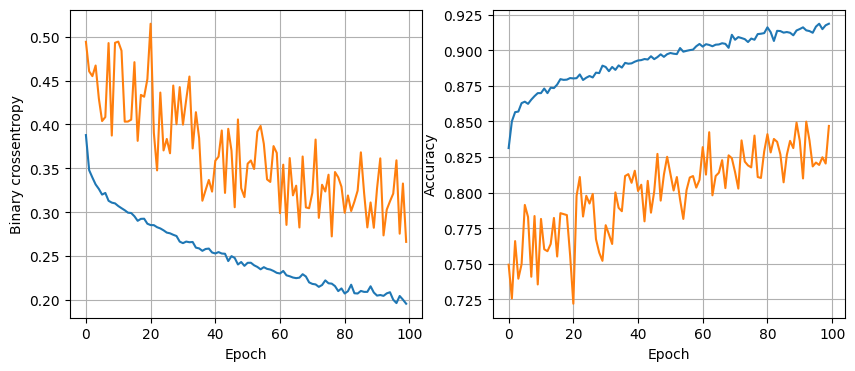

155/155 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.8430
64 nodes, dropout 0, lr 0.01, batch size 64


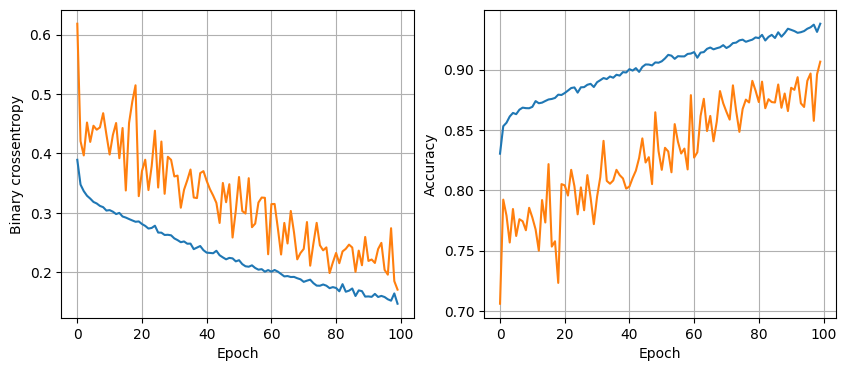

155/155 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.8270
64 nodes, dropout 0, lr 0.01, batch size 128


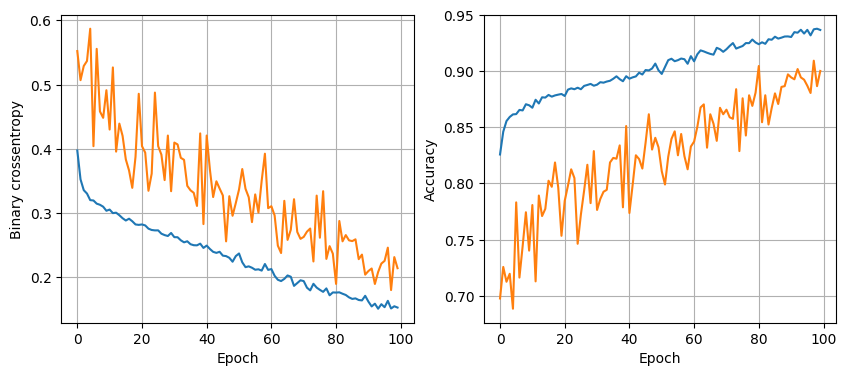

155/155 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.8383
64 nodes, dropout 0, lr 0.005, batch size 32


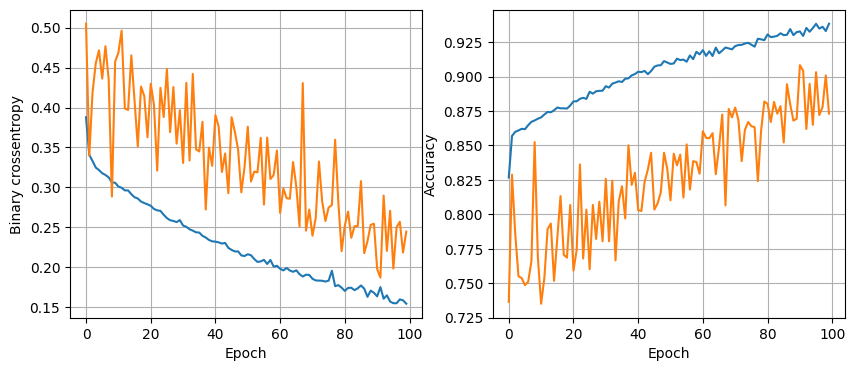

155/155 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.8411
64 nodes, dropout 0, lr 0.005, batch size 64


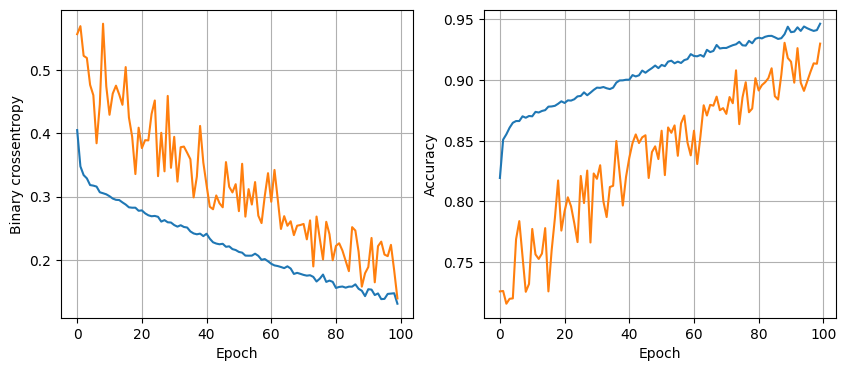

155/155 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.8341
64 nodes, dropout 0, lr 0.005, batch size 128


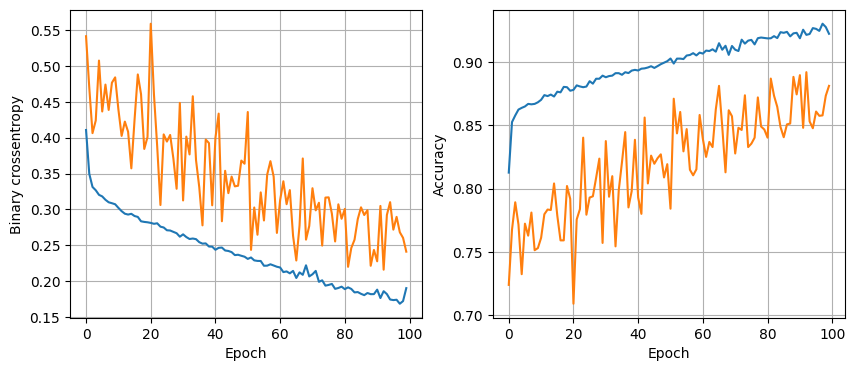

155/155 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.8381
64 nodes, dropout 0, lr 0.001, batch size 32


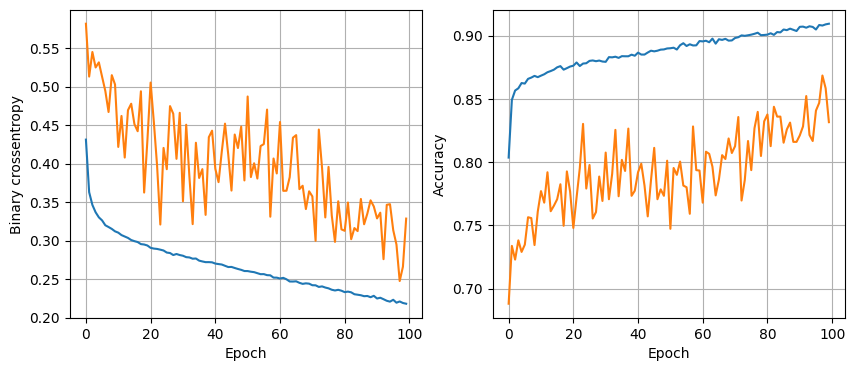

155/155 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8411
64 nodes, dropout 0, lr 0.001, batch size 64


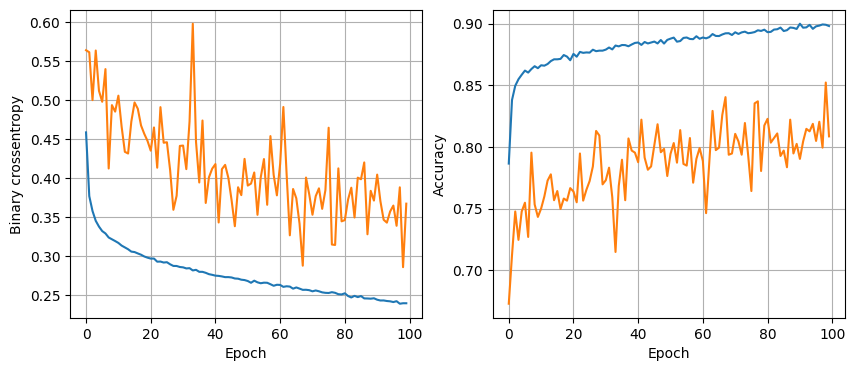

155/155 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8478
64 nodes, dropout 0, lr 0.001, batch size 128


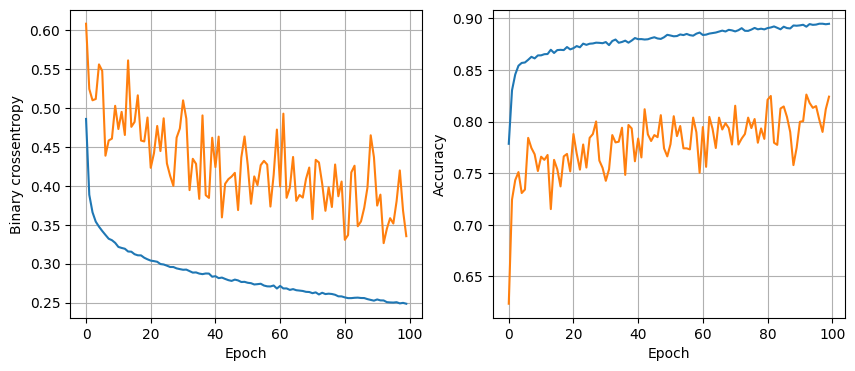

155/155 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8531
64 nodes, dropout 0.2, lr 0.01, batch size 32


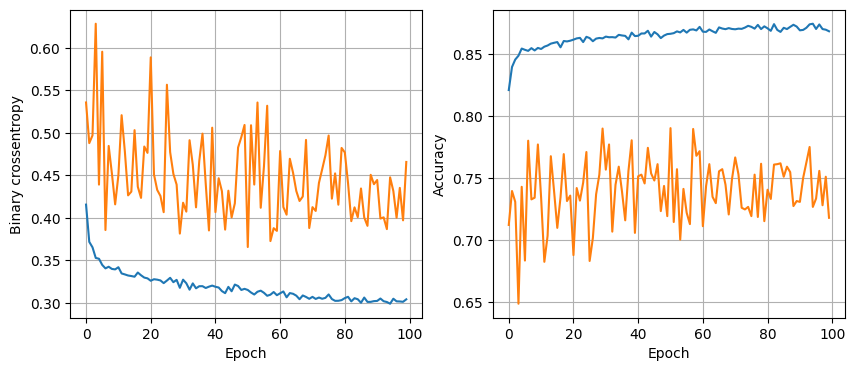

155/155 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8363
64 nodes, dropout 0.2, lr 0.01, batch size 64


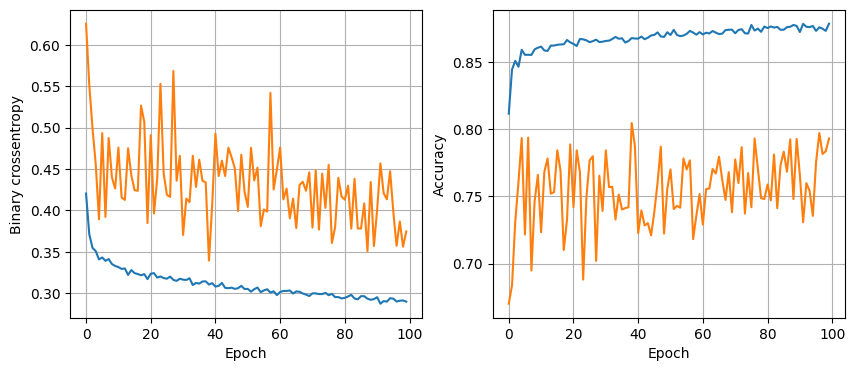

155/155 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8502
64 nodes, dropout 0.2, lr 0.01, batch size 128


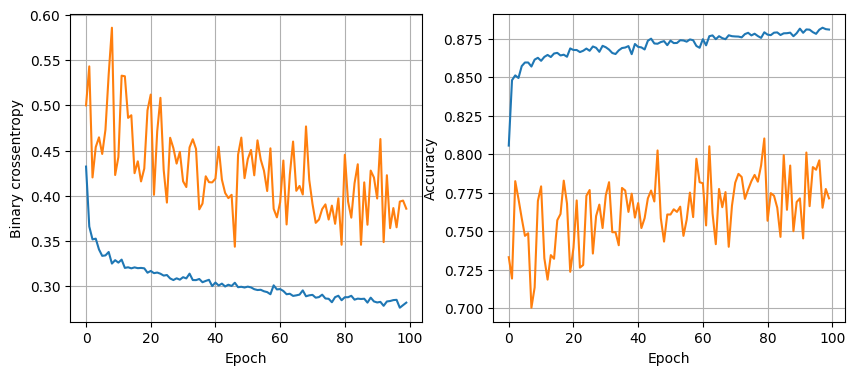

155/155 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8488
64 nodes, dropout 0.2, lr 0.005, batch size 32


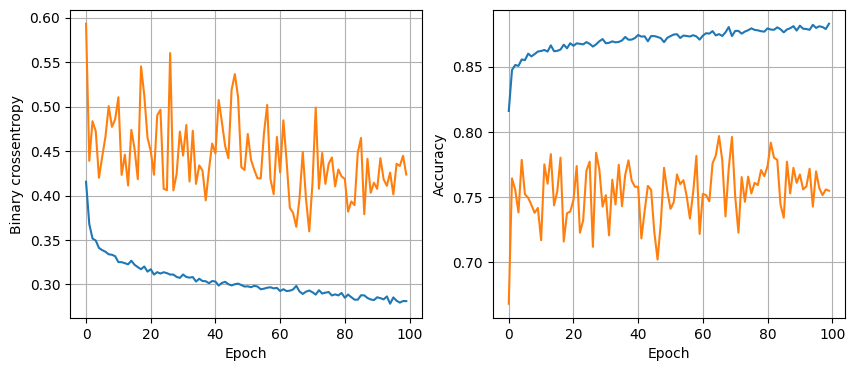

155/155 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8375
64 nodes, dropout 0.2, lr 0.005, batch size 64


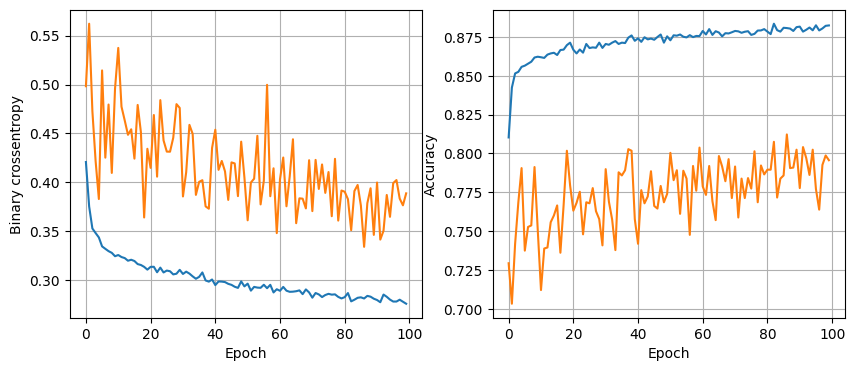

155/155 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8500
64 nodes, dropout 0.2, lr 0.005, batch size 128


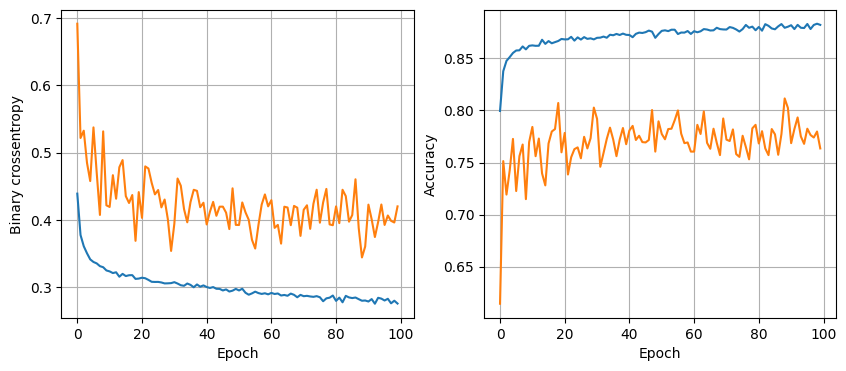

155/155 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8547
64 nodes, dropout 0.2, lr 0.001, batch size 32


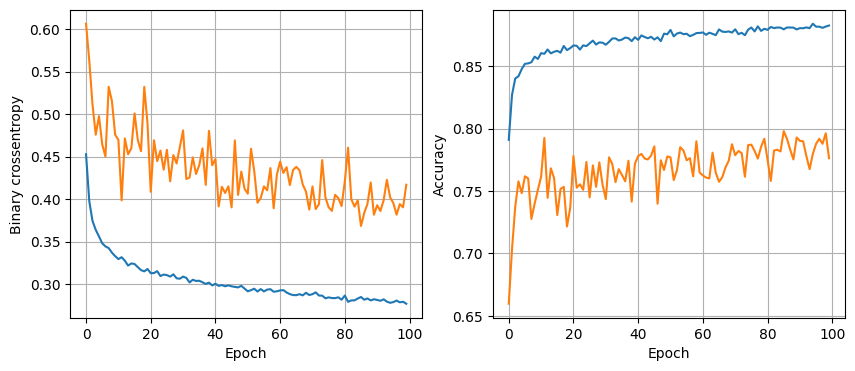

155/155 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8527
64 nodes, dropout 0.2, lr 0.001, batch size 64


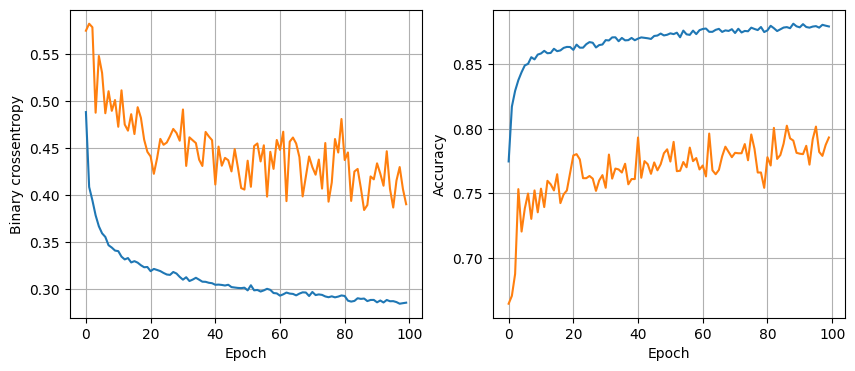

155/155 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8557
64 nodes, dropout 0.2, lr 0.001, batch size 128


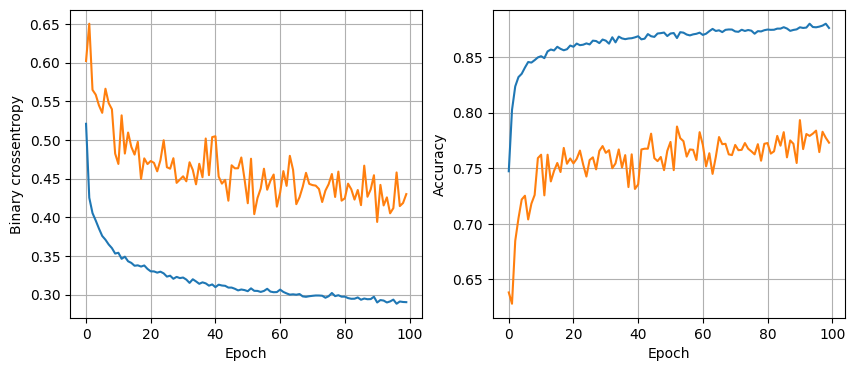

155/155 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8519


In [27]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [34]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,) # flatten into 1D array

119/119 [==============================] - 0s 3ms/step


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1334
           1       0.88      0.95      0.91      2470

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

